### Problem 2.1

In [7]:
import numpy as np

def iteration_function(x):
    return -x * (np.sin(1/x))**2

def simple_iteration(x0, num_iterations = 10):
    x = x0
    results = [x0]
    
    print(f"x0 = {x}")
    
    for i in range(num_iterations):
        x = iteration_function(x)
        results.append(x)
        print(f"x{i+1} = {x}")
        
    return results

x0s = [0.1, 0.2, 0.3, 0.4, 0.5]
print("Simple Iteration:")
print("=" * 40)

for x0 in x0s:
    print(f"\nStarting with x0 = {x0}:")
    iteration_results = simple_iteration(x0)
    x3 = iteration_results[3]
    print(f"\nx3 = {x3}")
    print("-" * 20)

Simple Iteration:

Starting with x0 = 0.1:
x0 = 0.1
x1 = -0.0295958969093304
x2 = 0.014314246928393913
x3 = -0.006585623467325778
x4 = 0.004952129206380014
x5 = -0.0028999186209537563
x6 = 0.0013125091645050907
x7 = -0.001307269781424997
x8 = 0.0013064681186483924
x9 = -0.0010647758886326117
x10 = 3.0988637698306394e-05

x3 = -0.006585623467325778
--------------------

Starting with x0 = 0.2:
x0 = 0.2
x1 = -0.18390715290764525
x2 = 0.10300914745272727
x3 = -0.0080373962161416
x4 = 0.007215519006787081
x5 = -0.0008958650959175675
x6 = 0.0006129997041166814
x7 = -0.0003372038950536414
x8 = 3.272280246128351e-06
x9 = -2.6711372355237893e-06
x10 = 2.541049832453031e-06

x3 = -0.0080373962161416
--------------------

Starting with x0 = 0.3:
x0 = 0.3
x1 = -0.010894844542353711
x2 = 0.004311289900387086
x3 = -0.001096972733586728
x4 = 0.0002878595666323098
x5 = -0.00011531217910392255
x6 = 0.00010793757348071752
x7 = -3.5879620485864524e-07
x8 = 2.526413335374454e-07
x9 = -5.929251550582438e-

The iteration does appear to converge to the fixed point 0.

### Problem 2.2

(a)

In [8]:
import numpy as np

def f(x):
    return np.sin(np.pi * x**3 /2)

def f_prime(x):
    return (3 * np.pi * x**2 /2) * np.cos(np.pi * x**3 /2)

def newtons_method(x0 = 0.25, tolerance = 1e-6, max_iteration = 100):
    results = [x0]
    x = x0
    
    for i in range(max_iteration):
        fx = f(x)
        fpx = f_prime(x)
        
        x_new = x - fx / fpx
        results.append(x_new)
        
        if abs(x_new) < tolerance:
            print(f"Newton's method converged in {i+1} iterations")
            return results, i+1
        
        x = x_new
       
    print(f"Newton's method did not converge within {max_iteration} iterations")
    return results, max_iteration
    
    
def secant_method(x0 = 0.25, x1 = 0.2, tolerance = 1e-6, max_iteration = 100):
    results = [x0, x1]
    
    for i in range(1, max_iteration):
        fx_k = f(results[i])
        fx_k2 = f(results[i-1])
        denominator = fx_k - fx_k2
        
        x_new = results[i] - (results[i] - results[i-1]) / denominator * fx_k
        results.append(x_new)
        
        if abs(x_new) < tolerance:
            print(f"Secant method converged in {i+1} iterations")
            return results, i+1
        
    print(f"Secant method did not converge within {max_iteration} iterations")
    return results, max_iteration

print("\nNewton's Method (x0 = 1/4):")
newton_results, newton_iterations = newtons_method(1/4, tolerance=1e-6)

print("\nSecant Method (x0 = 1/4, x1 = 1/5):")
secant_results, secant_iterations = secant_method(1/4, 1/5, tolerance=1e-6)


Newton's Method (x0 = 1/4):
Newton's method converged in 31 iterations

Secant Method (x0 = 1/4, x1 = 1/5):
Secant method converged in 45 iterations


(b)

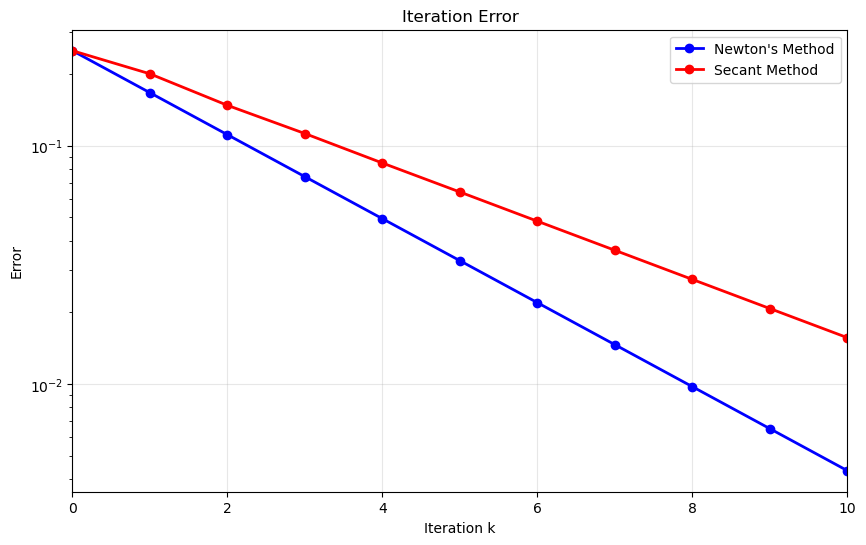

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def plot_errors(newton_results, secant_results, max_iterations=10):
    xi = 0
    
    newton_errors = []
    for i in range(min(len(newton_results), max_iterations + 1)):
        error = abs(newton_results[i] - xi)
        newton_errors.append(error)
    
    secant_errors = []
    for i in range(min(len(secant_results), max_iterations + 1)):
        error = abs(secant_results[i] - xi)
        secant_errors.append(error)
    
    plt.figure(figsize=(10, 6))
    
    newton_iterations = range(len(newton_errors))
    plt.semilogy(newton_iterations, newton_errors, 'bo-', label="Newton's Method", linewidth=2, markersize=6)
    
    secant_iterations = range(len(secant_errors))
    plt.semilogy(secant_iterations, secant_errors, 'ro-', label="Secant Method", linewidth=2, markersize=6)
    
    plt.xlabel('Iteration k')
    plt.ylabel('Error')
    plt.title('Iteration Error')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xlim(0, max_iterations)
    
    plt.show()


plot_errors(newton_results, secant_results, max_iterations=10)

(c)


P2.2(c) - Ratio plots

Running methods for ratio analysis...
Newton's method did not converge within 15 iterations
Secant method did not converge within 15 iterations


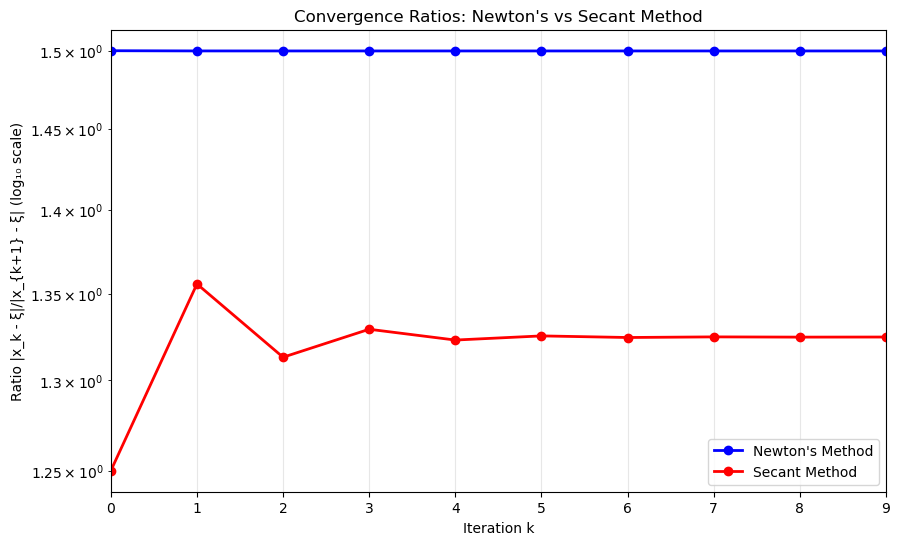

In [10]:
def plot_ratios(newton_results, secant_results, max_iterations=10):
    xi = 0
    
    newton_ratios = []
    for k in range(min(len(newton_results) - 1, max_iterations)):
        error_k = abs(newton_results[k] - xi)
        error_k_plus_1 = abs(newton_results[k + 1] - xi)
        
        if error_k_plus_1 > 1e-16:
            ratio = error_k / error_k_plus_1
            newton_ratios.append(ratio)
        else:
            break
    
    secant_ratios = []
    for k in range(min(len(secant_results) - 1, max_iterations)):
        error_k = abs(secant_results[k] - xi)
        error_k_plus_1 = abs(secant_results[k + 1] - xi)
        
        if error_k_plus_1 > 1e-16:
            ratio = error_k / error_k_plus_1
            secant_ratios.append(ratio)
        else:
            break
    
    plt.figure(figsize=(10, 6))
    
    newton_k_values = range(len(newton_ratios))
    plt.semilogy(newton_k_values, newton_ratios, 'bo-', label="Newton's Method", linewidth=2, markersize=6)
    
    secant_k_values = range(len(secant_ratios))
    plt.semilogy(secant_k_values, secant_ratios, 'ro-', label="Secant Method", linewidth=2, markersize=6)
    
    plt.xlabel('Iteration k')
    plt.ylabel('Ratio |x_k - ξ|/|x_{k+1} - ξ| (log₁₀ scale)')
    plt.title('Convergence Ratios: Newton\'s vs Secant Method')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xlim(0, 9)
    
    plt.show()
    
    return newton_ratios, secant_ratios

print("\nP2.2(c) - Ratio plots")
print("=" * 30)

print("\nRunning methods for ratio analysis...")
newton_results, _ = newtons_method(1/4, tolerance=1e-16, max_iteration=15)
secant_results, _ = secant_method(1/4, 1/5, tolerance=1e-16, max_iteration=15)

newton_ratios, secant_ratios = plot_ratios(newton_results, secant_results, max_iterations=10)

For Newton's method, the ratio appear to converge to 1.5, and for secant method, the ratio appear to converge to around 1.323

### Problem 2.3

(a)

Starting with x0 = 10
k=0: x0 = 10.000000, f(x0) = 100.086232
k=1: x1 = 9.166543, f(x1) = 83.940742
k=2: x2 = 8.345810, f(x2) = 69.632095
k=3: x3 = 7.539184, f(x3) = 56.939289
k=4: x4 = 6.748521, f(x4) = 45.536634
k=5: x5 = 5.977162, f(x5) = 35.626795
k=6: x6 = 5.228456, f(x6) = 27.293415
k=7: x7 = 4.505493, f(x7) = 20.347251
k=8: x8 = 3.812261, f(x8) = 14.624497
k=9: x9 = 3.154655, f(x9) = 10.050997
k=10: x10 = 2.540303, f(x10) = 6.549511
Starting with x0 = -10
k=0: x0 = -10.000000, f(x0) = 100.086232
k=1: x1 = -11.249755, f(x1) = 126.639543
k=2: x2 = -12.465819, f(x2) = 155.450210
k=3: x3 = -13.656847, f(x3) = 186.500413
k=4: x4 = -14.828426, f(x4) = 219.801394
k=5: x5 = -15.984394, f(x5) = 255.407879
k=6: x6 = -17.127466, f(x6) = 293.344314
k=7: x7 = -18.259680, f(x7) = 333.508615
k=8: x8 = -19.382646, f(x8) = 375.744965
k=9: x9 = -20.497684, f(x9) = 420.083488
k=10: x10 = -21.605825, f(x10) = 466.735939


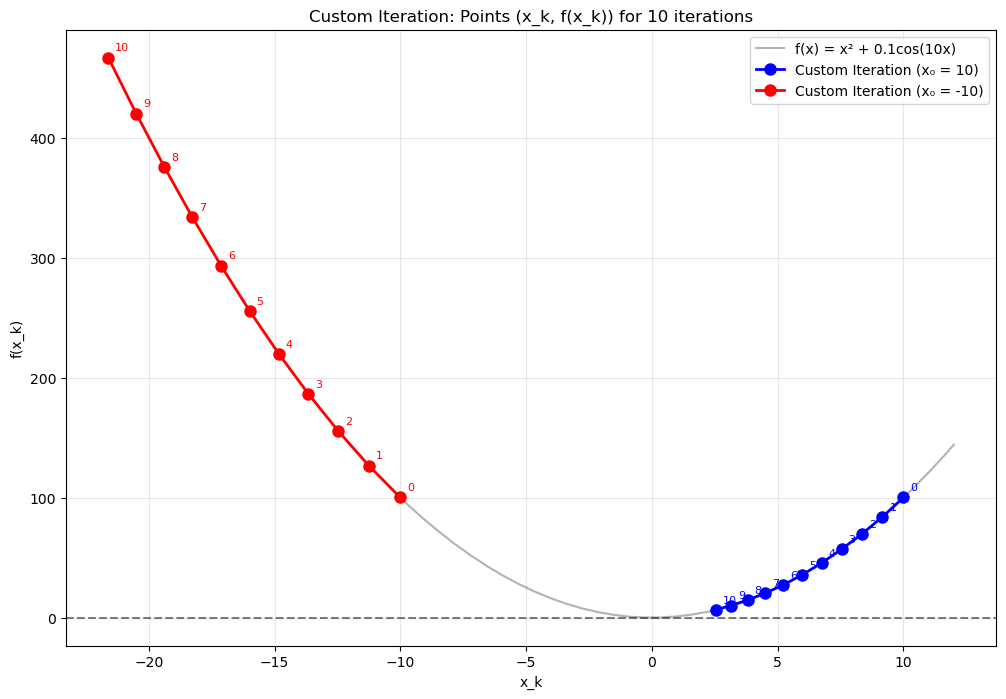

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2 + (1/10) * np.cos(10*x)

def custom_iteration(x0, max_iterations=10):
    results = [x0]
    x = x0
    
    print(f"Starting with x0 = {x0}")
    print(f"k=0: x0 = {x:.6f}, f(x0) = {f(x):.6f}")
    
    for k in range(max_iterations):
        fx = f(x)
        
        f_at_x_plus_fx = f(x + fx)
        
        denominator = f_at_x_plus_fx - fx
        
        x_new = x - (fx**2) / denominator
        results.append(x_new)
        
        print(f"k={k+1}: x{k+1} = {x_new:.6f}, f(x{k+1}) = {f(x_new):.6f}")
        
        x = x_new
    
    return results

def plot_iterations(results1, results2, x0_1, x0_2, method_name):
    plt.figure(figsize=(12, 8))
    
    fx_values1 = [f(x) for x in results1]
    fx_values2 = [f(x) for x in results2]
    
    x_range = np.linspace(-12, 12, 1000)
    y_range = f(x_range)
    plt.plot(x_range, y_range, 'k-', alpha=0.3, label='f(x) = x² + 0.1cos(10x)')
    
    plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
    
    plt.plot(results1, fx_values1, 'bo-', markersize=8, linewidth=2, 
             label=f'{method_name} (x₀ = {x0_1})')
    
    plt.plot(results2, fx_values2, 'ro-', markersize=8, linewidth=2, 
             label=f'{method_name} (x₀ = {x0_2})')
    
    for i, (x, fx) in enumerate(zip(results1, fx_values1)):
        plt.annotate(f'{i}', (x, fx), xytext=(5, 5), textcoords='offset points', 
                    color='blue', fontsize=8)
    
    for i, (x, fx) in enumerate(zip(results2, fx_values2)):
        plt.annotate(f'{i}', (x, fx), xytext=(5, 5), textcoords='offset points', 
                    color='red', fontsize=8)
    
    plt.xlabel('x_k')
    plt.ylabel('f(x_k)')
    plt.title(f'{method_name}: Points (x_k, f(x_k)) for 10 iterations')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

results_10 = custom_iteration(10, max_iterations=10)

results_neg10 = custom_iteration(-10, max_iterations=10)

plot_iterations(results_10, results_neg10, 10, -10, "Custom Iteration")

The convergence pattern seems not symmetric, and from 10 approaches to the fixed point at a slow, steady rate. It diverges when starting from -10. Both showed about linear pattern.

(b)




P2.3(b) - Newton's Method

Newton's Method - Starting from x0 = 10:
Starting with x0 = 10
k=0: x0 = 10.000000, f(x0) = 100.086232
k=1: x1 = 5.119260, f(x1) = 26.266840
k=2: x2 = 2.336351, f(x2) = 5.438821
k=3: x3 = 1.374252, f(x3) = 1.927016
k=4: x4 = 0.318568, f(x4) = 0.001583
k=5: x5 = 0.316245, f(x5) = 0.000032
k=6: x6 = 0.316195, f(x6) = 0.000000
k=7: x7 = 0.316195, f(x7) = 0.000000
k=8: x8 = 0.316195, f(x8) = 0.000000
k=9: x9 = 0.316195, f(x9) = 0.000000
k=10: x10 = 0.316195, f(x10) = 0.000000

Newton's Method - Starting from x0 = -10:
Starting with x0 = -10
k=0: x0 = -10.000000, f(x0) = 100.086232
k=1: x1 = -5.119260, f(x1) = 26.266840
k=2: x2 = -2.336351, f(x2) = 5.438821
k=3: x3 = -1.374252, f(x3) = 1.927016
k=4: x4 = -0.318568, f(x4) = 0.001583
k=5: x5 = -0.316245, f(x5) = 0.000032
k=6: x6 = -0.316195, f(x6) = 0.000000
k=7: x7 = -0.316195, f(x7) = 0.000000
k=8: x8 = -0.316195, f(x8) = 0.000000
k=9: x9 = -0.316195, f(x9) = 0.000000
k=10: x10 = -0.316195, f(x10) = 0.000000


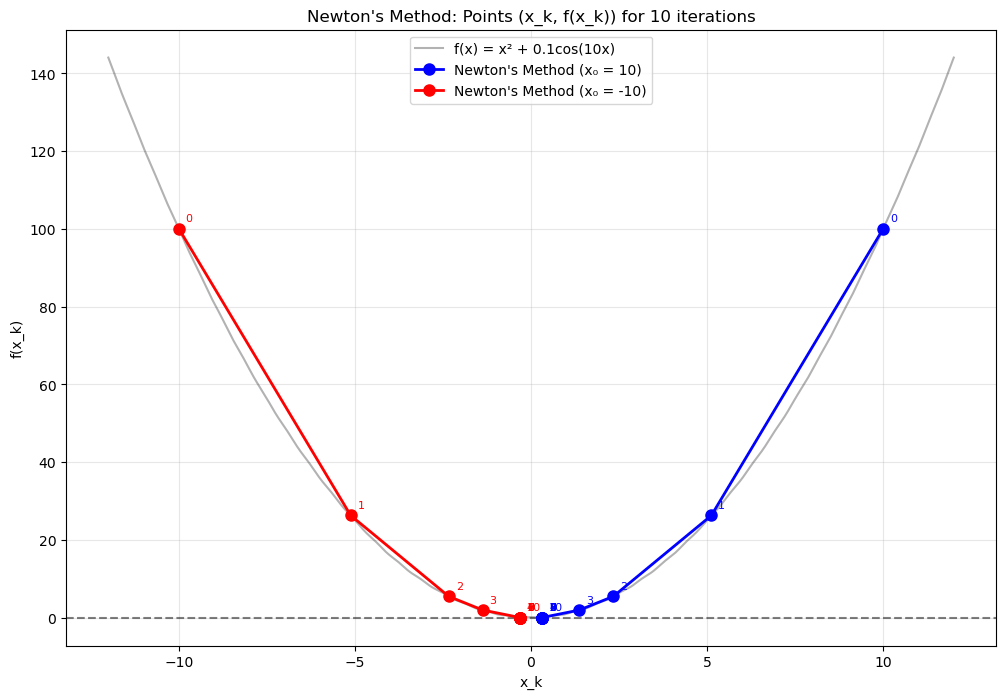

In [12]:
def f_prime(x):
    return 2*x - np.sin(10*x)

def newtons_method_p23(x0, max_iterations=10):
    results = [x0]
    x = x0
    
    print(f"Starting with x0 = {x0}")
    print(f"k=0: x0 = {x:.6f}, f(x0) = {f(x):.6f}")
    
    for k in range(max_iterations):
        fx = f(x)
        fpx = f_prime(x)
        
        x_new = x - fx / fpx
        results.append(x_new)
        
        print(f"k={k+1}: x{k+1} = {x_new:.6f}, f(x{k+1}) = {f(x_new):.6f}")
        
        x = x_new
    
    return results

print("\n\nP2.3(b) - Newton's Method")
print("=" * 50)

print("\n" + "="*30)
print("Newton's Method - Starting from x0 = 10:")
print("="*30)
newton_results_10 = newtons_method_p23(10, max_iterations=10)

print("\n" + "="*30)
print("Newton's Method - Starting from x0 = -10:")
print("="*30)
newton_results_neg10 = newtons_method_p23(-10, max_iterations=10)

plot_iterations(newton_results_10, newton_results_neg10, 10, -10, "Newton's Method")

Newton's method shows much faster convergence rate. It converges quadratically. In only a few steps it is already very close to the fixed point. Also, Newton's method shows symmetric behavior for both -10 and 10. Two side both shows the same rate and rapid convergence.